In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data_preprocessing import process_and_split_file

In [2]:
file_path = '150x66_raw.csv'

In [3]:
segments = process_and_split_file(file_path)

In [4]:
len(segments)

12

In [5]:
for segment in segments:
    print(segment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 1 to 3420
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   table         3420 non-null   object
 1   _start        3420 non-null   object
 2   _stop         3420 non-null   object
 3   _time         3420 non-null   object
 4   _value        3420 non-null   object
 5   _field        3420 non-null   object
 6   _measurement  3420 non-null   object
 7   port          3420 non-null   object
 8   server        3420 non-null   object
dtypes: object(9)
memory usage: 240.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 1 to 3420
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   table           3420 non-null   object
 1   _start          3420 non-null   object
 2   _stop           3420 non-null   object
 3   _time           3420 non-null   object
 4   _value    

In [6]:
column_sets = [set(segment.columns) for segment in segments]

# Find common columns
common_columns = set.intersection(*column_sets)

# Print the common columns
print(common_columns)

{'_value', '_time', '_measurement', '_field', '_start', 'table', '_stop'}


In [7]:
for segment in segments:
    print(segment['table'].max())

5
9
17
23
28
34
35
68
73
74
80
84


In [10]:
for segment in segments:
    # Convert the _time column to datetime
    segment['_time'] = pd.to_datetime(segment['_time'])

    # Extract seconds and check if they end in 0 or 5
    valid_seconds = ((segment['_time'].dt.second % 10 == 0) | (segment['_time'].dt.second % 10 == 5))

    # Verify whether all segments use a multiple of 5 for each value in _time
    if valid_seconds.all():
        print("All values in _time column of this segment end in 0 or 5")
    else:
        print("Some values in _time column of this segment do not end in 0 or 5")


All values in _time column of this segment end in 0 or 5
Some values in _time column of this segment do not end in 0 or 5
Some values in _time column of this segment do not end in 0 or 5
Some values in _time column of this segment do not end in 0 or 5
All values in _time column of this segment end in 0 or 5
All values in _time column of this segment end in 0 or 5
All values in _time column of this segment end in 0 or 5
All values in _time column of this segment end in 0 or 5
All values in _time column of this segment end in 0 or 5
All values in _time column of this segment end in 0 or 5
All values in _time column of this segment end in 0 or 5
All values in _time column of this segment end in 0 or 5


At this point some elements of the data processing step had to be done in order to investigate further.

In [14]:
dataset = pd.read_csv('train_test_data/dataset.csv')

In [15]:
dataset.describe()

,app_httpd_busyw,res_httpd_l1,res_httpd_l15,res_httpd_l5,app_httpd_sckeepalive,app_httpd_scwait,res_app1_cpupct,res_db_cpupct,res_httpd_cpupct,res_app1_mempct,...,app_/a/s/c/i_DEL_SE,app_/a/s/c_GET_SE,app_/a/s/c_POST_SE,app_/a/s/f_DEL_CE,app_/a/s/f_DEL_SE,app_/a/s_DEL_SE,app_/a/s_GET_CE,app_/t_GET_SE,app_root_PUT_SE.1,5xx_lag_agg
count,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,...,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000
mean,141.707878,5.416260,4.799380,5.143073,0.372465,100.647816,37.477014,100.851525,0.573610,80.454560,...,0.997942,3.776987,7.353492,0.077258,2.996678,2.745744,0.142580,3.744359,2.667841,1.008580
std,69.402433,1.446135,0.661292,0.777260,0.918296,7.976482,22.492290,4.746301,0.289744,14.745143,...,6.834937,10.563023,17.170484,1.234918,12.705650,10.443018,0.981715,9.917419,8.541095,1.187431
min,1.000000,0.970000,1.800000,1.220000,0.000000,74.000000,0.155810,0.561809,0.004275,41.413116,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,4.380000,4.590000,4.850000,0.000000,99.000000,20.557875,100.540553,0.364008,66.844749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,151.000000,5.340000,4.980000,5.310000,0.000000,99.000000,34.788338,101.033191,0.541343,87.878418,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,201.000000,6.470000,5.250000,5.630000,0.000000,100.000000,51.146956,101.549373,0.749288,94.074440,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,251.000000,10.220000,5.640000,6.630000,10.000000,155.000000,104.450422,106.300253,2.073600,99.899292,...,57.103432,42.601000,63.504856,19.808931,90.605505,50.395951,8.783148,30.006631,30.001896,3.000000


In [16]:
# List of prefixes to search for
prefixes = ['app', 'res', 'log', 'net']

# Initialize a dictionary to hold the counts
prefix_counts = {prefix: 0 for prefix in prefixes}

# Iterate over the columns and count the prefixes
for column in dataset.columns:
    for prefix in prefixes:
        if column.startswith(prefix):
            prefix_counts[prefix] += 1

# Output the counts
print(prefix_counts)

{'app': 60, 'res': 17, 'log': 5, 'net': 6}


In [16]:
dataset['5xx_lag'].describe()

count    2564.000000
mean       32.234009
std        48.275633
min         0.000000
25%         0.000000
50%         5.000000
75%        46.250000
max       175.000000
Name: 5xx_lag, dtype: float64

In [10]:
correlation_matrix = dataset.corr(numeric_only=True)

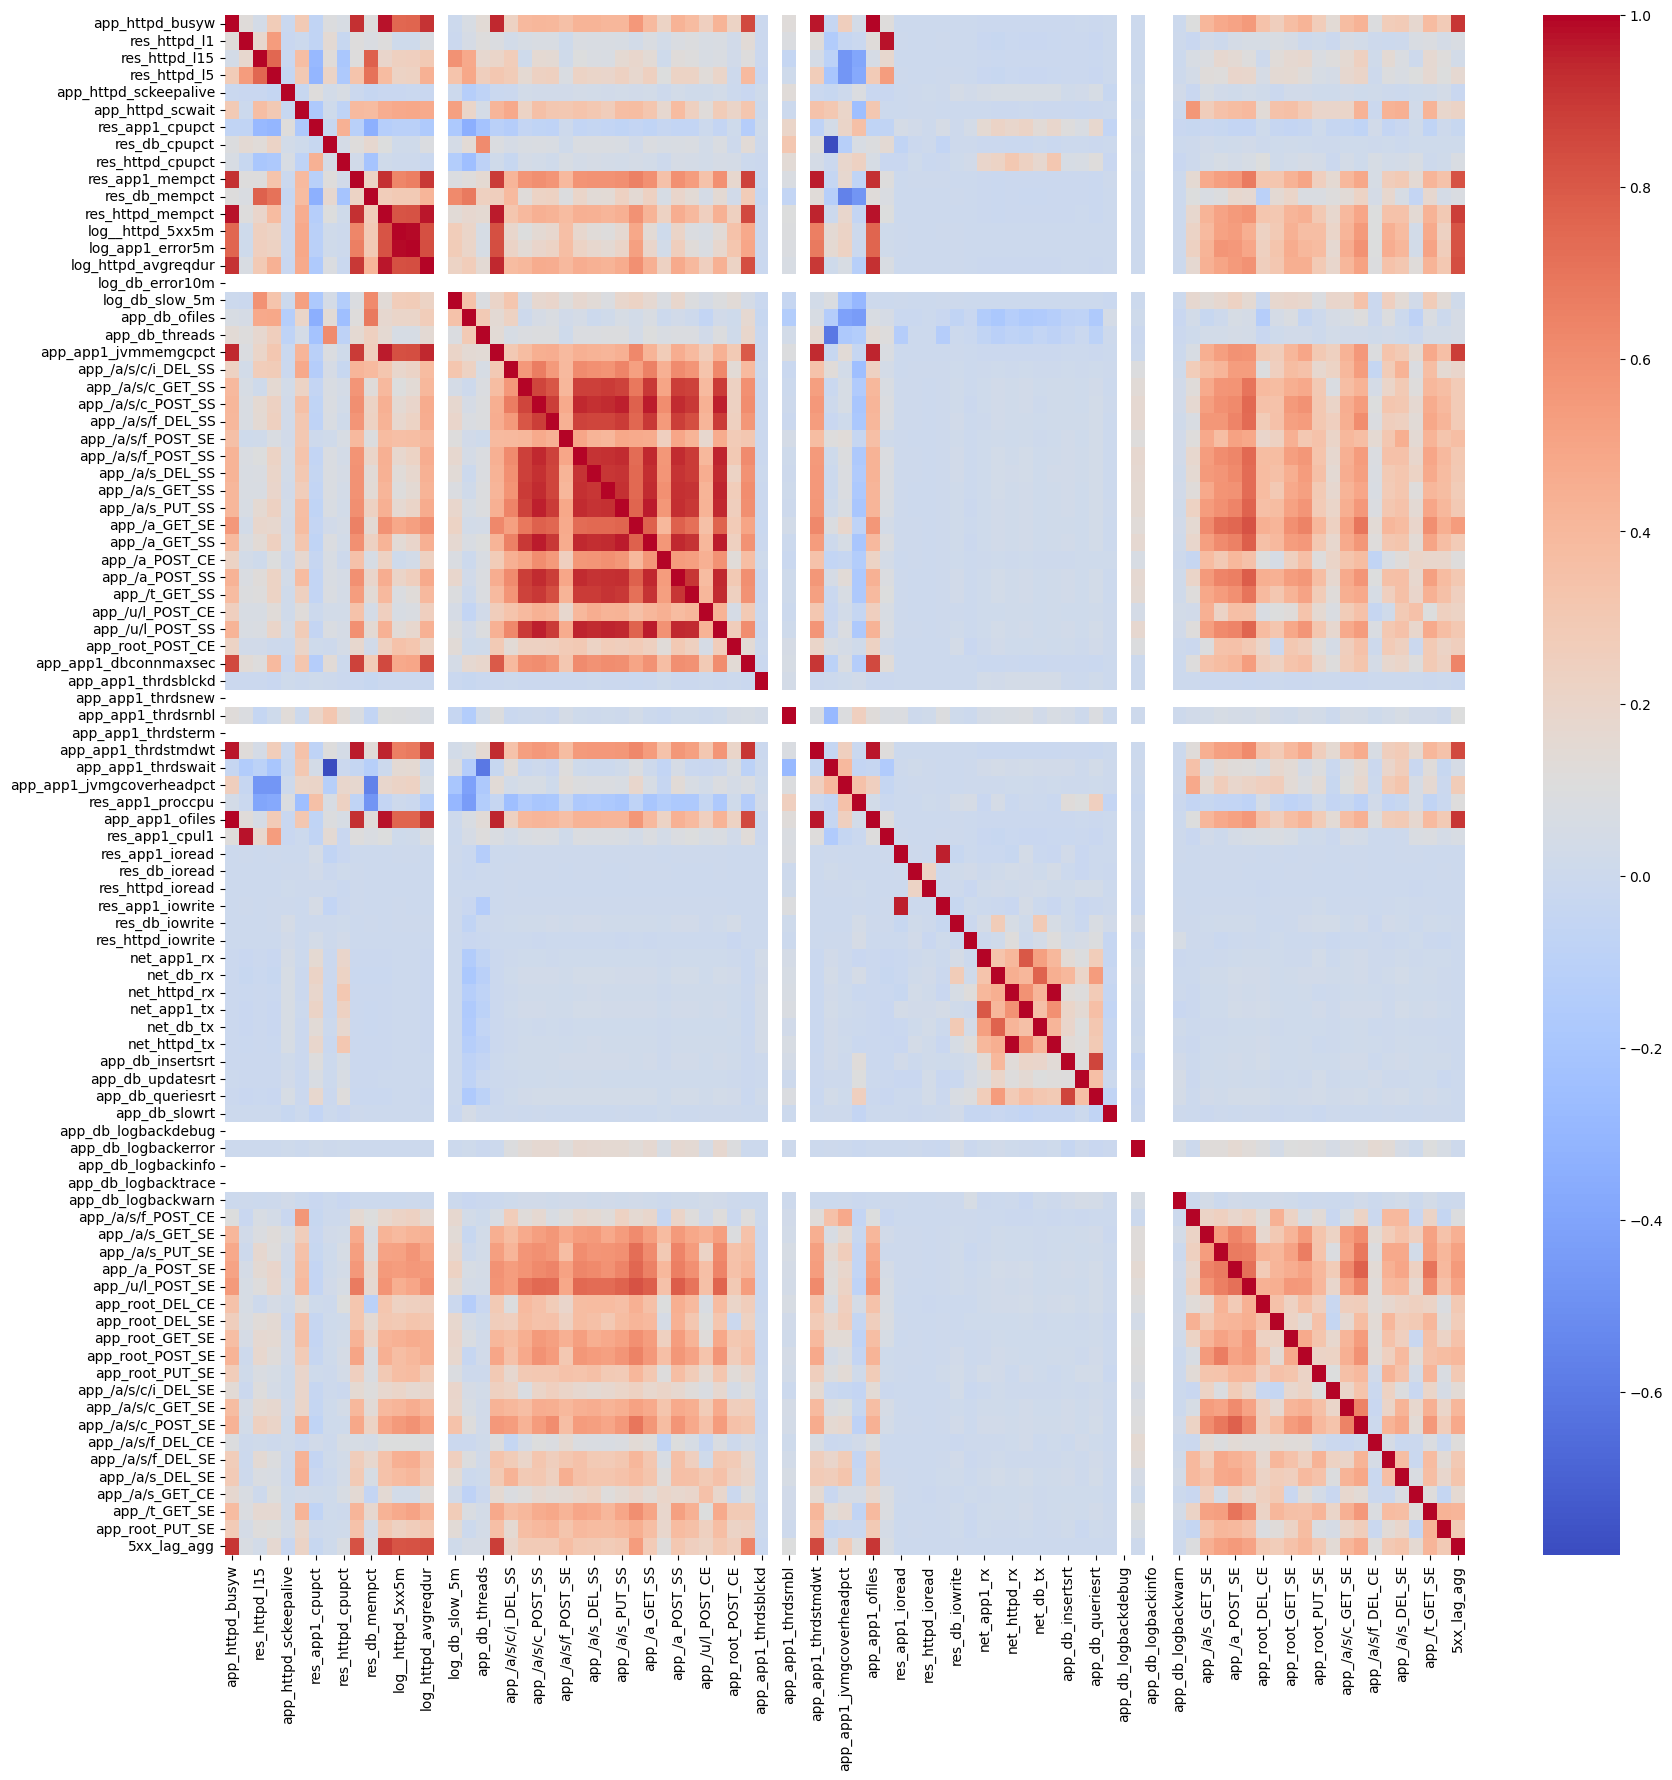

In [11]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [12]:
# Filter for high correlations
high_corr = correlation_matrix.abs().unstack()
high_corr = high_corr.sort_values(ascending=False)
high_corr = high_corr[high_corr < 1]  # Exclude self-correlation
high_corr = high_corr[high_corr > 0.8]  # Cutoff threshold because of high dimensionality
high_corr

net_httpd_tx       net_httpd_rx         0.998942
net_httpd_rx       net_httpd_tx         0.998942
app_httpd_busyw    app_app1_ofiles      0.998916
app_app1_ofiles    app_httpd_busyw      0.998916
log__httpd_5xx5m   log_app1_error5m     0.991526
                                          ...   
5xx_lag_agg        log__httpd_5xx5m     0.815781
app_/a/s/c_GET_SS  app_/a/s/f_DEL_SS    0.807907
app_/a/s/f_DEL_SS  app_/a/s/c_GET_SS    0.807907
net_app1_rx        net_app1_tx          0.800031
net_app1_tx        net_app1_rx          0.800031
Length: 208, dtype: float64

In [13]:
target_corr = correlation_matrix['5xx_lag_agg'].sort_values(ascending=False)
target_corr.to_csv('correlation.csv')